In [1]:
import database.fetch as fetch
from corelation import CorMatrix, make_data, iterate_cor
from corelation import create_corelation_data
import load

In [2]:
import common.dates as dates
#dates.group_data(tweet_df, ['nltk', 'flair'], method='avg').head()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#vix_df, spx_df, tweet_df, user_df = load.fetch_data()
#vix_df, spx_df = load.rename_fin_columns(vix_df, spx_df)

In [5]:
# 
groups = ["1T", "5T", "15T", "30T", "60T", "120T", "180T", "1440T"]#[str(i) + 'T' for i in range(1, 4)]
deltas = [1, 5, 15, 30, 60, 120, 180, 1440]

groups = ["60T", "180T", "360T", "720T", "1440T"]
deltas = list(range(0,4320,30))
#deltas = [0, 60, 120, 180, 240, 360, 720, 1440, 2880, 4320]

In [6]:
4320/30

144.0

In [7]:
DATA = create_corelation_data(groups, deltas)

In [8]:
DATA

{'include_neut': {'pearson':                spx:nltk  spx:flair  vix:nltk  vix:flair   spx:vix  nltk:flair
  groups deltas                                                                
  60T    0       0.041158  -0.065174 -0.078918   0.035093 -0.764818    0.184196
         30      0.041289  -0.031433 -0.074656  -0.005409 -0.785483    0.184196
         60      0.002610   0.006568  0.052241   0.014263 -0.764818    0.184196
         90      0.005256  -0.043054  0.055118   0.071005 -0.785483    0.184196
         120     0.093495  -0.023401 -0.085300   0.056608 -0.764818    0.184196
  ...                 ...        ...       ...        ...       ...         ...
  1440T  4170   -0.021924   0.321866  0.211111  -0.286188 -0.757908    0.429552
         4200   -0.021924   0.321866  0.211111  -0.286188 -0.757908    0.429552
         4230   -0.021924   0.321866  0.211111  -0.286188 -0.757908    0.429552
         4260   -0.021924   0.321866  0.211111  -0.286188 -0.757908    0.429552
         4290

Focus points: spx:nltk, vix:nltk, spx:vix




    XXX  Everything below   XXX
Observations:
spx:nltk --
    removing neutral sentiment increases corelation with spearman and pearson testing.
    looking at the day generalization is more valuable (and less noisy) then looking at smaller groups is also observed with the vix:nltk.
    Corelation caps off after four days of delta value for all tests and neutral sentiment in/exclusion.
    .733 ~= 2.2/3... 

In [1]:
def plot_cor_vs_delta(data, method, column):
    ticks = list(range(0,4320,30))
    groups = ["60T", "180T", "360T", "720T", "1440T"]
    fig, axes = plt.subplots(ncols=2, nrows=len(groups), figsize=(20, 24))

        

    for ind, group in enumerate(groups):
        
    
        ax = axes[ind][0]
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['spx:nltk'], 'c:', label='spx:nltk, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['spx:nltk'], 'c--', label='spx:nltk, spearman')
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['spx:flair'], 'm:', label='spx:flair, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['spx:flair'], 'm--', label='spx:flair, spearman')

        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_title("Corelation of Sentiment on Future SPX Prices of Delta Exclude Neutral, Group=(" + group + ")")
        ax.legend()
        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")

        ax = axes[ind][1]
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['vix:nltk'], 'c:', label='vix:nltk, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['vix:nltk'], 'c--', label='vix:nltk, spearman')
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['vix:flair'], 'm:', label='vix:flair, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['vix:flair'], 'm--', label='vix:flair, spearman')

        ax.set_xticks(ticks)
        #ax.set_xticklabels(ticks)
        ax.set_title("Corelation of Sentiment on Future VIX Prices of Delta Exclude Neutral, Group=(" + group + ")")
        ax.legend()
        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")
        
        
    

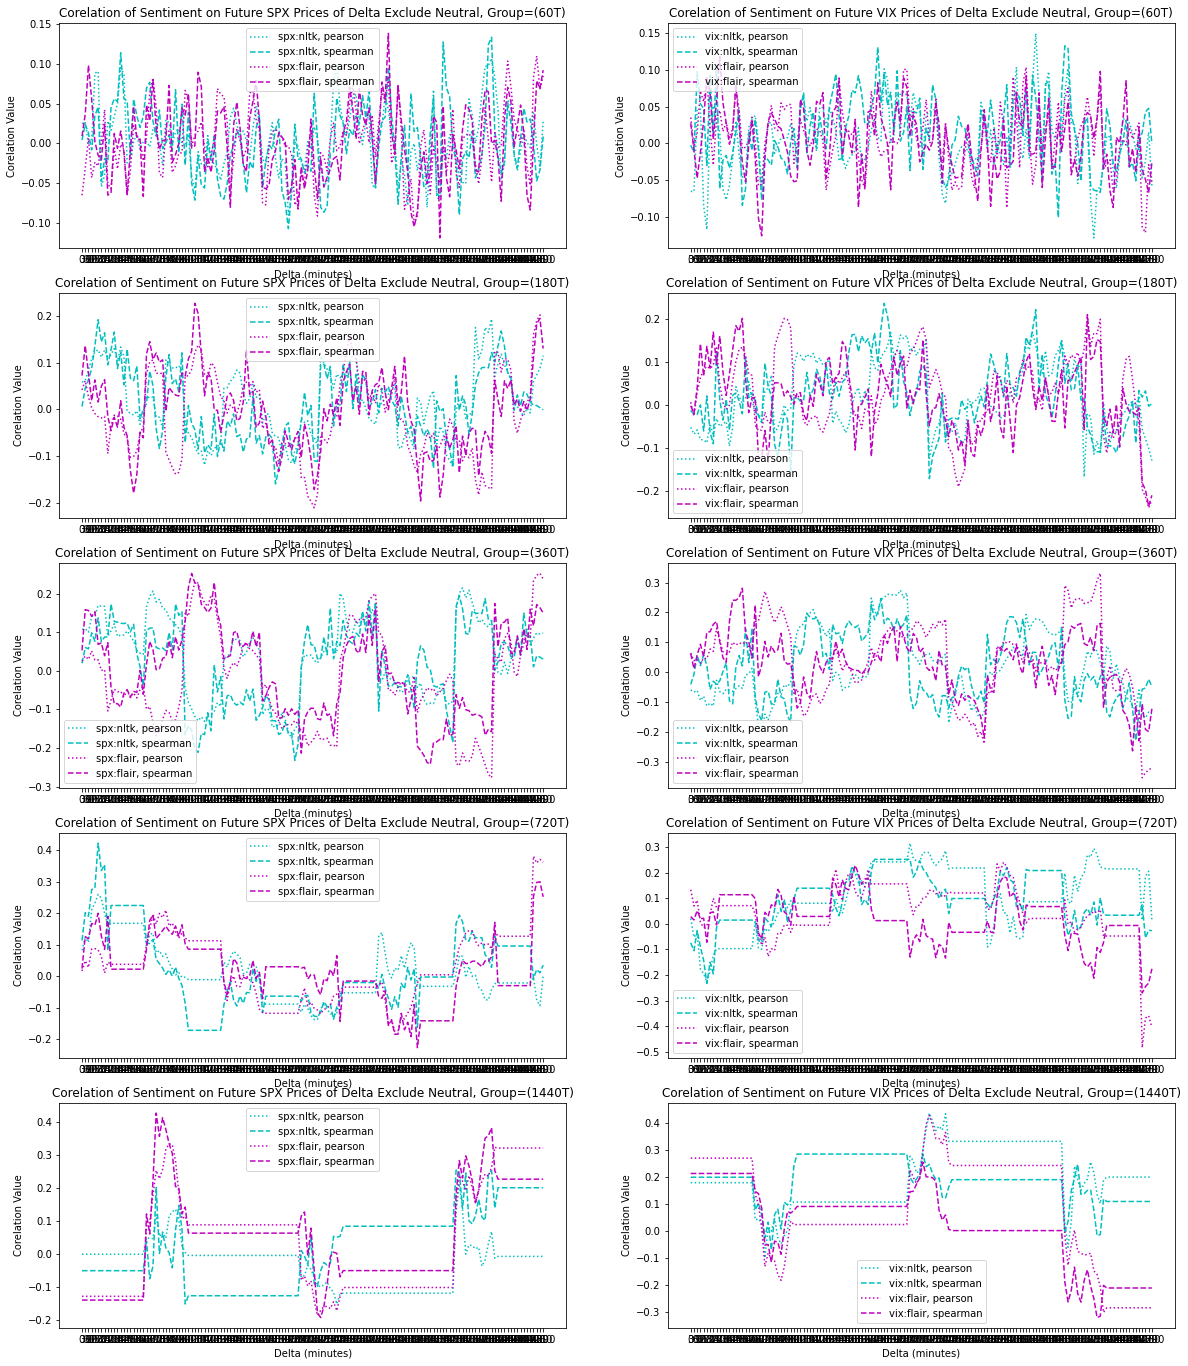

In [14]:
plot_cor_vs_delta(DATA, 'pearson', 'spx:nltk')

There are 10 graphs above.
Each graph shows the relationship between corelation of sentiment and an index. The left column shows the corelation between tweet sentiment and the SPX index. The right column show the corelation betweet tweet sentiment and the VIX index.

Each graph has a group value, which represents the grouping of data measured in minutes. For instance, with a group = 60T, the sentiment for tweets grouped at 60 minutes by average weighted sentiment and the index closing prices are grouped together by 60 minute intervals and using the percent change of the latest closing price of the a 60 minute and the latest closing price of the previous 60 minute intercal as the value recorded.

Both sentiment analysis models, nltk and flair, are plotted alongside each other where the nltk is cyan and the flair is magenta. The thick dashed lines use the pearson corelation. The thin dashed lines use the spearman corelation formula. The corelation axis is this value according to the coresponding formula and can range from a value of -1 to +1.

The delta value is located on the x axis and is used to corespond sentiment with price change. With a delta value of 1440 minutes, or 1 day equivalently, the corelation is calculated by using the sentiment data for day i and the close price difference for day i+1, or 1440 minutes from when the sentiment was recorded.


Looking at these graphs we can see the relationship of corelation between price difference and tweet sentiment as we increase the disparity between those two points.

The assumption is that the SPX should be positively corelated with positive sentiment and the VIX should be negatively corelated with negative sentiment.

We have the most amount of data points when delta and group are small. We start using groups of one hour 



In [26]:
def plot_cor_vs_delta(data, method, column):
    ticks = list(range(0,4320,30))
    groups = ["60T", "180T", "360T", "720T", "1440T"]
    fig, axes = plt.subplots(ncols=2, nrows=len(groups), figsize=(20, 24))


    for ind, group in enumerate(groups):
        
    
        ax = axes[ind][0]
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, smooth(data['exclude_neut']['pearson'].loc[group]['spx:nltk']), 'c:', label='spx:nltk, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, smooth(data['exclude_neut']['spearman'].loc[group]['spx:nltk']), 'c--', label='spx:nltk, spearman')
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, smooth(data['exclude_neut']['pearson'].loc[group]['spx:flair']), 'm:', label='spx:flair, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, smooth(data['exclude_neut']['spearman'].loc[group]['spx:flair']), 'm--', label='spx:flair, spearman')

        #ax.set_xticks(ticks)
        #ax.set_xticklabels(ticks)
        ax.set_title("Corelation of Sentiment on Future SPX Prices of Delta Exclude Neutral, Group=(" + group + ")")
        ax.legend()
        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")

        ax = axes[ind][1]
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, smooth(data['exclude_neut']['pearson'].loc[group]['vix:nltk']), 'c:', label='vix:nltk, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, smooth(data['exclude_neut']['spearman'].loc[group]['vix:nltk']), 'c--', label='vix:nltk, spearman')
        ax.plot(data['exclude_neut']['pearson'].loc[group].index, smooth(data['exclude_neut']['pearson'].loc[group]['vix:flair']), 'm:', label='vix:flair, pearson')
        ax.plot(data['exclude_neut']['spearman'].loc[group].index, smooth(data['exclude_neut']['spearman'].loc[group]['vix:flair']), 'm--', label='vix:flair, spearman')

        #ax.set_xticks(ticks)
        #ax.set_xticklabels(ticks)
        ax.set_title("Corelation of Sentiment on Future VIX Prices of Delta Exclude Neutral, Group=(" + group + ")")
        ax.legend()
        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")

from scipy.signal import lfilter

def smooth(y, n=30, a=1):
    b = [1.0 / n] * n
    yy = lfilter(b,a,y)
    return yy

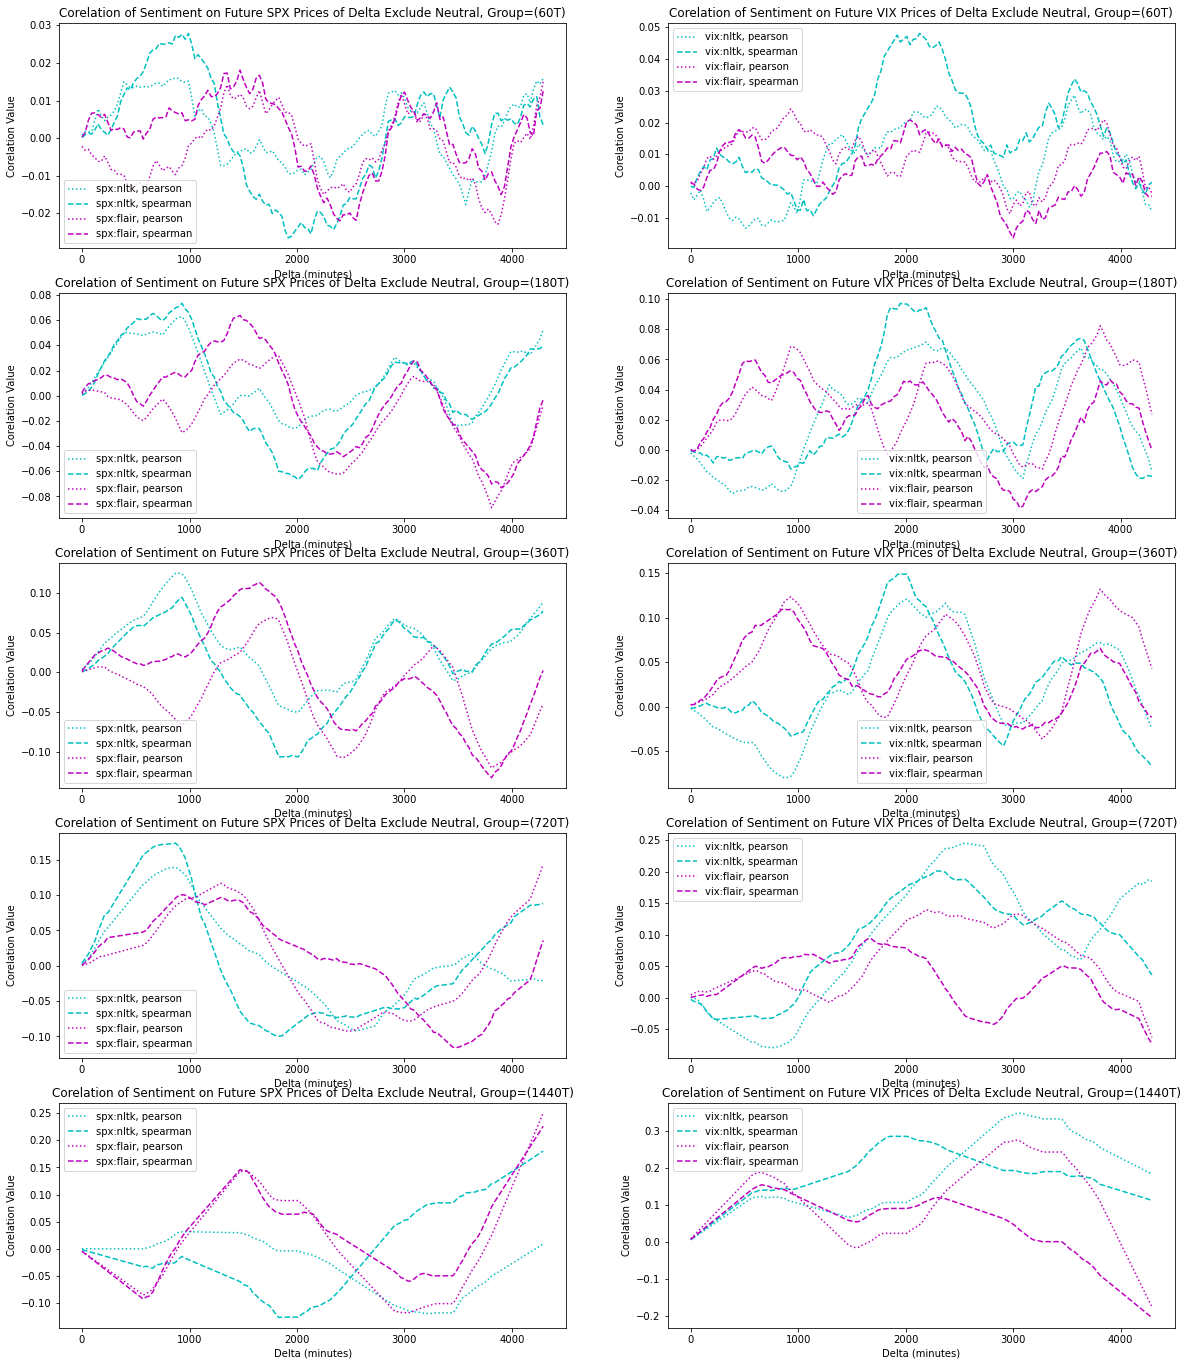

In [27]:
plot_cor_vs_delta(DATA, 'pearson', 'spx:nltk')

    ticks = list(range(0,4320,30))

ticks = ticks[g*i for i in range(3)]

60T 2 [0, 60, 120, 180, 240, 300]
180T 6 [0, 180, 360, 540, 720, 900]
360T 12 [0, 360, 720, 1080, 1440, 1800]
720T 24 [0, 720, 1440, 2160, 2880, 3600]
1440T 48 [0, 1440, 2880]


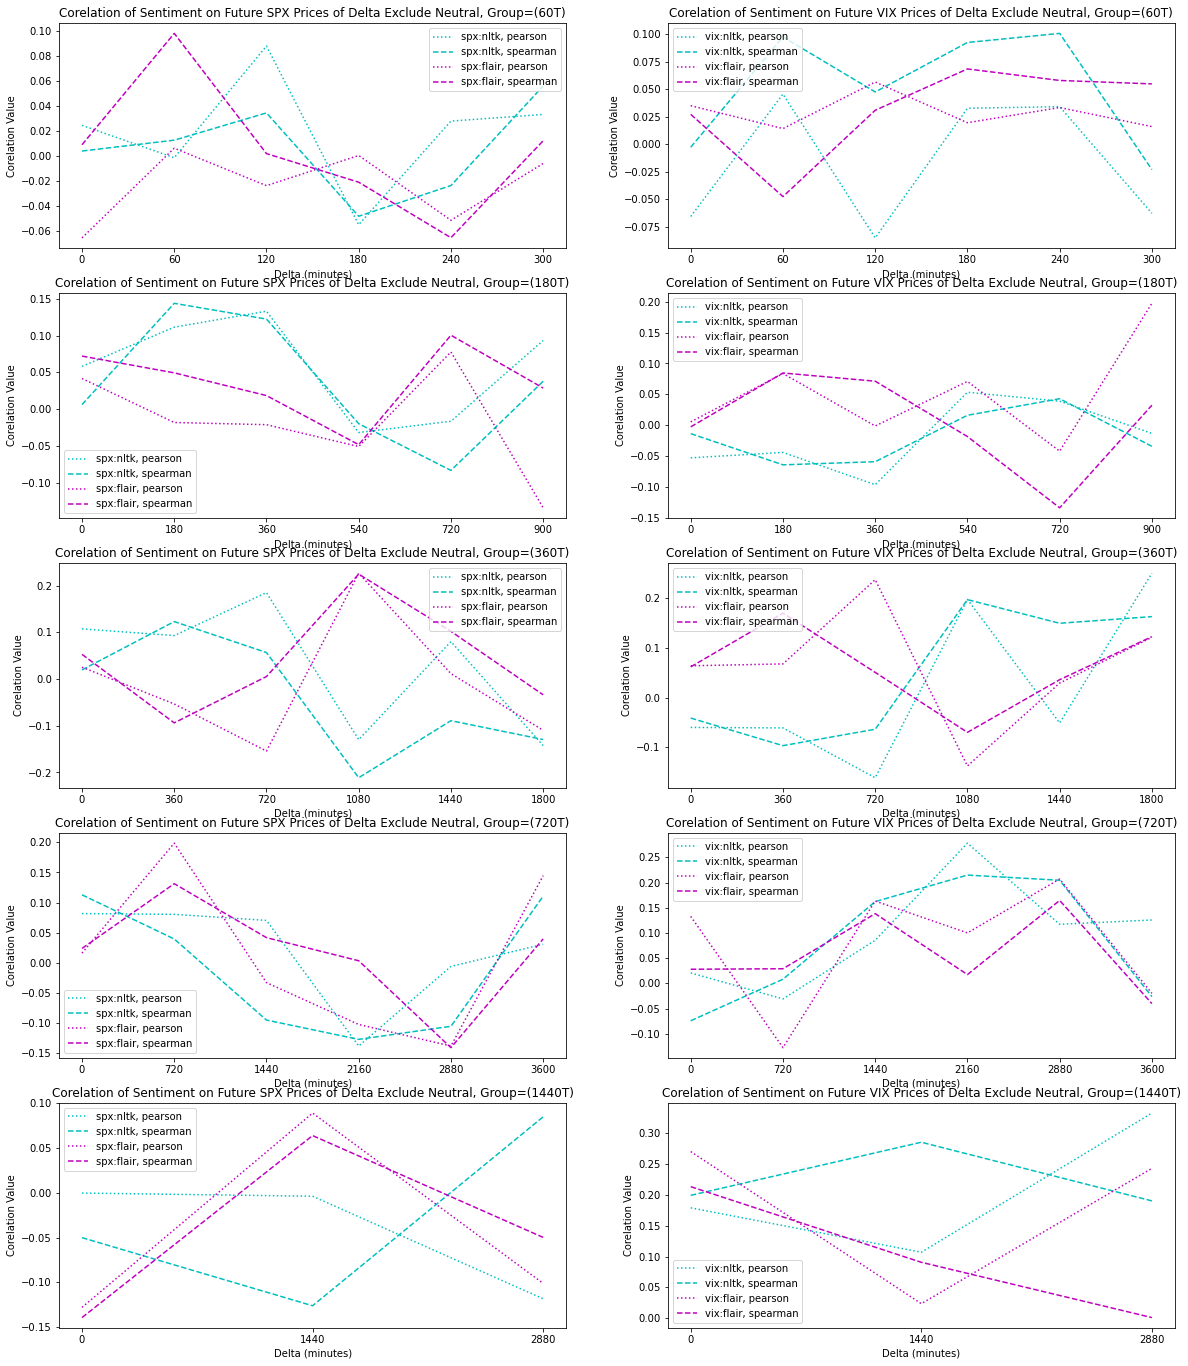

In [105]:
plot_cor_vs_delta3(DATA, 'pearson', 'spx:nltk')

In [88]:
def plot_cor_vs_delta3(data, method, column):
    import matplotlib.pyplot as plt
    import pandas as pd
    ticks1 = list(range(0,4320,30))
    groups = ["60T", "180T", "360T", "720T", "1440T"]
    #fig1, axes1 = plt.subplots(ncols=1, nrows=len(groups), figsize=(22, 24))
    #fig2, axes2 = plt.subplots(ncols=1, nrows=len(groups), figsize=(22, 24))

    #figs, axes=[fig1, fig2], [axes1, axes2]
    
    #fig.subplots_adjust(hspace=.8)

    

    for ind, group in enumerate(groups):
        fig1, axes1 = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
        fig2, axes2 = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

        figs, axes=[fig1, fig2], [axes1, axes2]
        g = int(int(group[:-1])/30)
        if group == "1440T":
            ticks = [ticks1[g*i] for i in range(3)]
        else:
            ticks = [ticks1[g*i] for i in range(6)]
        print(group, g, ticks)
        #for t in ticks:

        #   print(t, data['exclude_neut']['pearson'].loc[group].index[t])

        
        ax = axes1
        
        
        x = ticks
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['pearson'].loc[group].index[t])
            y.append(data['exclude_neut']['pearson'].loc[group]['spx:nltk'].loc[t]) 
        ax.plot(x, y,  'c:', label='spx:nltk, pearson')
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['spearman'].loc[group].index[t])
            y.append(data['exclude_neut']['spearman'].loc[group]['spx:nltk'].loc[t]) 
        ax.plot(x, y,  'c--', label='spx:nltk, spearman')

        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['pearson'].loc[group].index[t])
            y.append(data['exclude_neut']['pearson'].loc[group]['spx:flair'].loc[t]) 
        ax.plot(x, y,  'm:', label='spx:flair, pearson')
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['spearman'].loc[group].index[t])
            y.append(data['exclude_neut']['spearman'].loc[group]['spx:flair'].loc[t]) 
        ax.plot(x, y,  'm--', label='spx:flair, spearman')
        
        
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['spx:nltk'], 'c:', label='spx:nltk, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['spx:nltk'], 'c--', label='spx:nltk, spearman')
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['spx:flair'], 'm:', label='spx:flair, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['spx:flair'], 'm--', label='spx:flair, spearman')

        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_title("Corelation of Sentiment on Future SPX Prices of Delta Exclude Neutral, Group=(" + group + ")")
        ax.legend()#(loc='center right', bbox_to_anchor=(1.25, .8))
        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")

        fig1.show()
        #plt.close
        ax = axes2
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['pearson'].loc[group].index[t])
            y.append(data['exclude_neut']['pearson'].loc[group]['vix:nltk'].loc[t]) 
        ax.plot(x, y,  'c:', label='vix:nltk, pearson')
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['spearman'].loc[group].index[t])
            y.append(data['exclude_neut']['spearman'].loc[group]['vix:nltk'].loc[t]) 
        ax.plot(x, y,  'c--', label='vix:nltk, spearman')

        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['pearson'].loc[group].index[t])
            y.append(data['exclude_neut']['pearson'].loc[group]['vix:flair'].loc[t]) 
        ax.plot(x, y,  'm:', label='vix:flair, pearson')
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['spearman'].loc[group].index[t])
            y.append(data['exclude_neut']['spearman'].loc[group]['vix:flair'].loc[t]) 
        ax.plot(x, y,  'm--', label='vix:flair, spearman')
        
        
        
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['vix:nltk'], 'c:', label='vix:nltk, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['vix:nltk'], 'c--', label='vix:nltk, spearman')
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['vix:flair'], 'm:', label='vix:flair, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['vix:flair'], 'm--', label='vix:flair, spearman')

        ax.set_xticks(ticks)
        #ax.set_xticklabels(ticks)
        ax.set_title("Corelation of Sentiment on Future VIX Prices of Delta Exclude Neutral, Group=(" + group + ")")
        ax.legend()#(loc='center right', bbox_to_anchor=(1, .8))

        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")
        fig2.show()
        #plt.close()
    #plt.show()
        
        
    

60T 2 [0, 60, 120, 180, 240, 300]
180T 6 [0, 180, 360, 540, 720, 900]
360T 12 [0, 360, 720, 1080, 1440, 1800]
720T 24 [0, 720, 1440, 2160, 2880, 3600]


C:\Users\jake\Anaconda3\envs\sproj2\lib\site-packages\ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\jake\Anaconda3\envs\sproj2\lib\site-packages\ipykernel_launcher.py:121: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


1440T 48 [0, 1440, 2880]


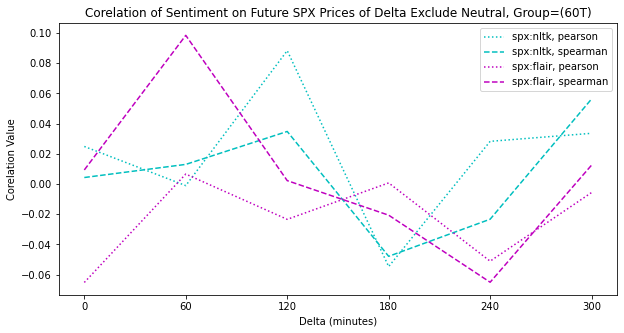

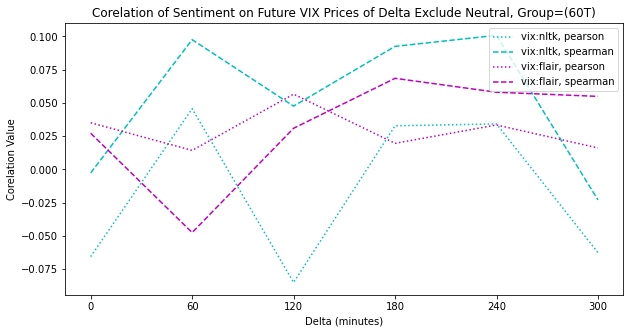

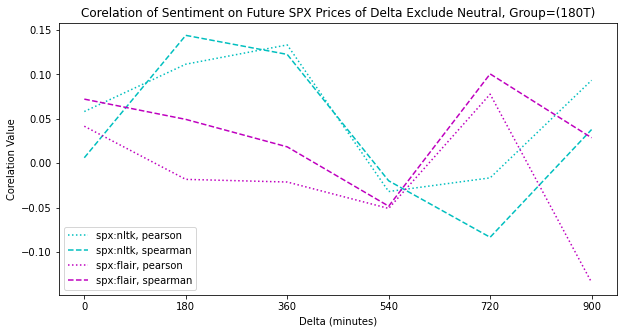

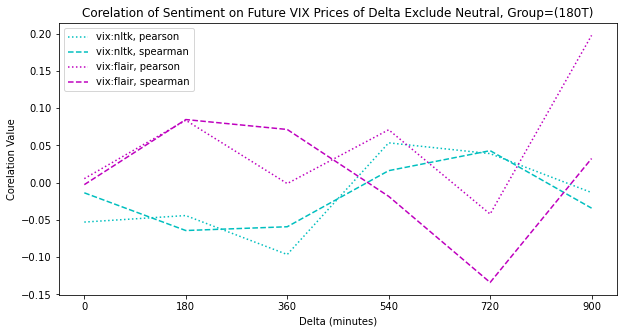

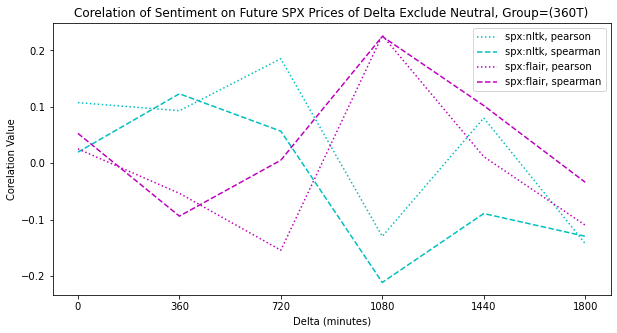

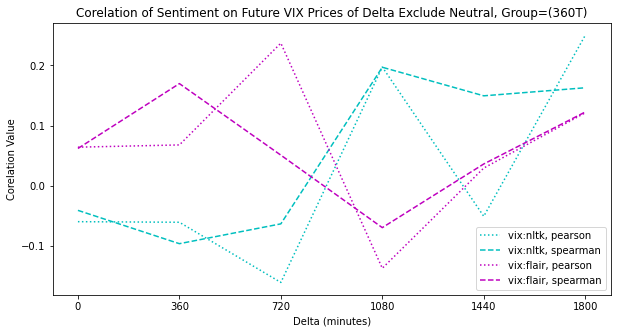

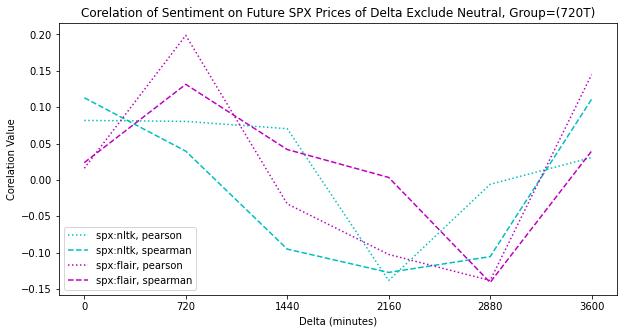

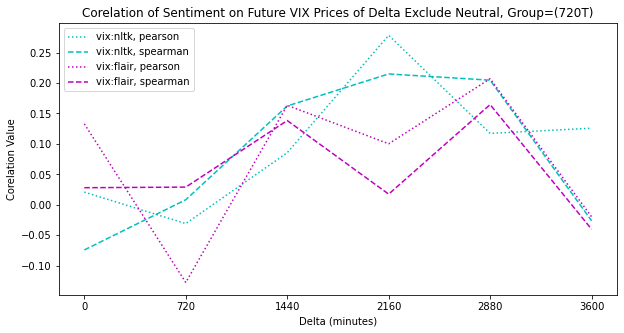

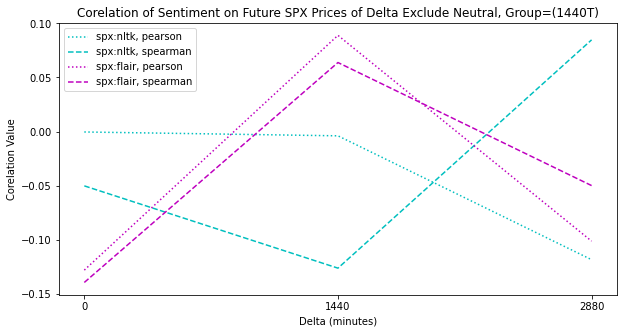

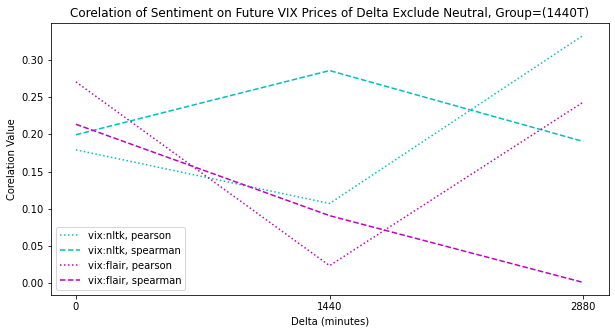

In [89]:
plot_cor_vs_delta3(DATA, 'noodle', 'spx:nltk')

In [3]:
import pickle
#pickle.dump( DATA, open( "corelation_data.p", "wb" ) )

In [4]:
DATA = pickle.load( open( "corelation_data.p", "rb" ) )

In [135]:
#DATA
groups = ["60T", "180T", "360T", "720T", "1440T"]
deltas = list(range(0,4320,30))
i=5
method = "spearman"
comparison = 'vix:nltk'


for g in groups:
    d = int(int(g[:-1])/30)
    d = deltas[d*i]
    DF = DATA['exclude_neut'][method].loc[g].loc[d][comparison]
    #print(DF.loc[DF['spx:nltk']==max(DF["spx:nltk"])])
    #print(DF.sort_values(by='spx:nltk', ascending=False))
    print(g, DF)
    print()

60T -0.022995655559255677

180T -0.03430628378397351

360T 0.16279259923922274

720T -0.02628770477506761



IndexError: list index out of range

In [136]:
# Real final

In [143]:
def plot_cor_vs_delta4(data):
    import matplotlib.pyplot as plt
    import pandas as pd
    ticks1 = list(range(0,4320,30))
    groups = ["60T", "180T", "360T", "720T", "1440T"]
    #fig1, axes1 = plt.subplots(ncols=1, nrows=len(groups), figsize=(22, 24))
    #fig2, axes2 = plt.subplots(ncols=1, nrows=len(groups), figsize=(22, 24))

    #figs, axes=[fig1, fig2], [axes1, axes2]
    
    #fig.subplots_adjust(hspace=.8)

    

    for ind, group in enumerate(groups):
        fig1, axes1 = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
        fig2, axes2 = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

        figs, axes=[fig1, fig2], [axes1, axes2]
        g = int(int(group[:-1])/30)
        if group == "1440T":
            ticks = [ticks1[g*i] for i in range(3)]
        else:
            ticks = [ticks1[g*i] for i in range(6)]
        print(group, g, ticks)
        #for t in ticks:

        #   print(t, data['exclude_neut']['pearson'].loc[group].index[t])

        
        ax = axes1
        
        
        x = ticks
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['pearson'].loc[group].index[t])
            y.append(data['exclude_neut']['pearson'].loc[group]['spx:nltk'].loc[t]) 
        ax.plot(x, y,  'c:', label='spx:nltk, pearson')
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['spearman'].loc[group].index[t])
            y.append(data['exclude_neut']['spearman'].loc[group]['spx:nltk'].loc[t]) 
        ax.plot(x, y,  'c--', label='spx:nltk, spearman')

        #x = []
        
        
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['spx:nltk'], 'c:', label='spx:nltk, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['spx:nltk'], 'c--', label='spx:nltk, spearman')
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['spx:flair'], 'm:', label='spx:flair, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['spx:flair'], 'm--', label='spx:flair, spearman')

        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_title("Corelation of NLTK Sentiment on SPX Movement (Group=" + group + ")")
        ax.legend()#(loc='center right', bbox_to_anchor=(1.25, .8))
        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")

        fig1.show()
        #plt.close
        ax = axes2
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['pearson'].loc[group].index[t])
            y.append(data['exclude_neut']['pearson'].loc[group]['vix:nltk'].loc[t]) 
        ax.plot(x, y,  'm:', label='vix:nltk, pearson')
        
        #x = []
        y = []
        for t in ticks:
            #x.append(data['exclude_neut']['spearman'].loc[group].index[t])
            y.append(data['exclude_neut']['spearman'].loc[group]['vix:nltk'].loc[t]) 
        ax.plot(x, y,  'm--', label='vix:nltk, spearman')
        
        
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['vix:nltk'], 'c:', label='vix:nltk, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['vix:nltk'], 'c--', label='vix:nltk, spearman')
        #ax.plot(data['exclude_neut']['pearson'].loc[group].index, data['exclude_neut']['pearson'].loc[group]['vix:flair'], 'm:', label='vix:flair, pearson')
        #ax.plot(data['exclude_neut']['spearman'].loc[group].index, data['exclude_neut']['spearman'].loc[group]['vix:flair'], 'm--', label='vix:flair, spearman')

        ax.set_xticks(ticks)
        #ax.set_xticklabels(ticks)
        ax.set_title("Corelation of NLTK Sentiment on VIX Movement (Group=" + group + ")")
        ax.legend()#(loc='center right', bbox_to_anchor=(1, .8))

        ax.set_xlabel("Delta (minutes)")
        ax.set_ylabel("Corelation Value")
        fig2.show()
        #plt.close()
    #plt.show()
        
        
    

60T 2 [0, 60, 120, 180, 240, 300]
180T 6 [0, 180, 360, 540, 720, 900]
360T 12 [0, 360, 720, 1080, 1440, 1800]
720T 24 [0, 720, 1440, 2160, 2880, 3600]
1440T 48 [0, 1440, 2880]


C:\Users\jake\Anaconda3\envs\sproj2\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\jake\Anaconda3\envs\sproj2\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


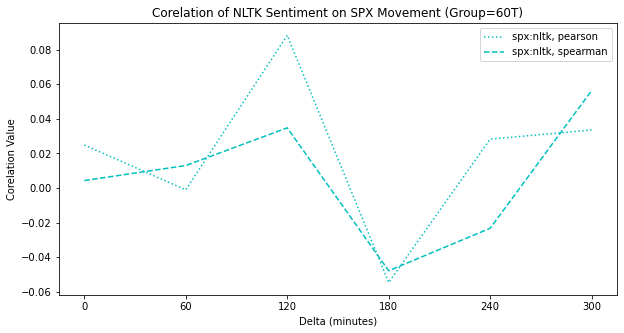

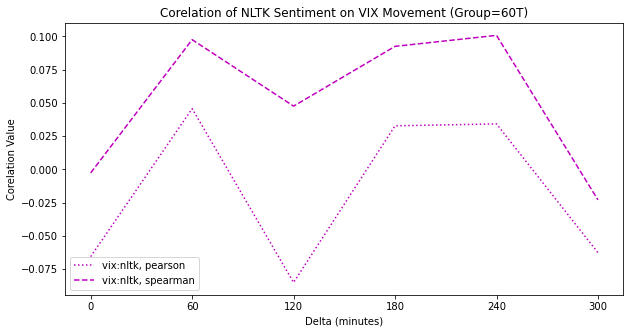

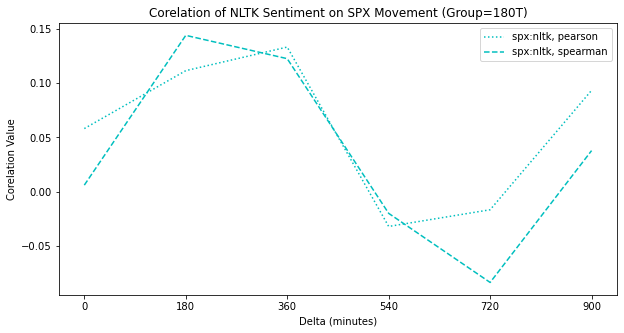

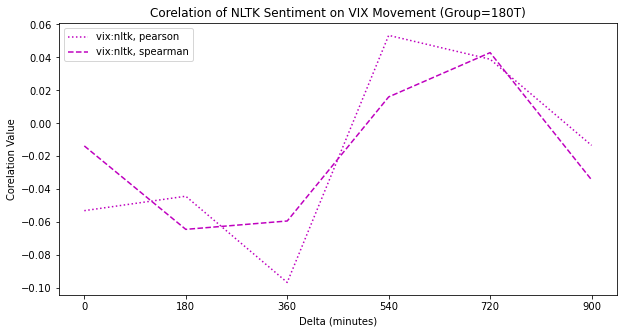

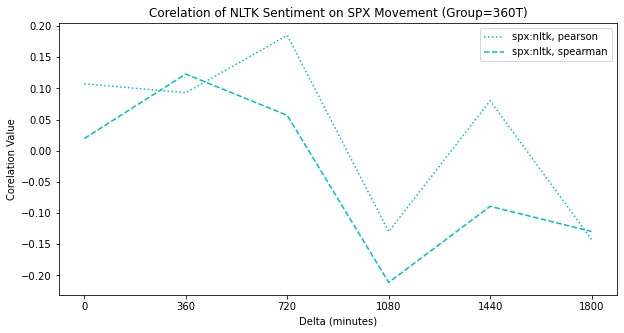

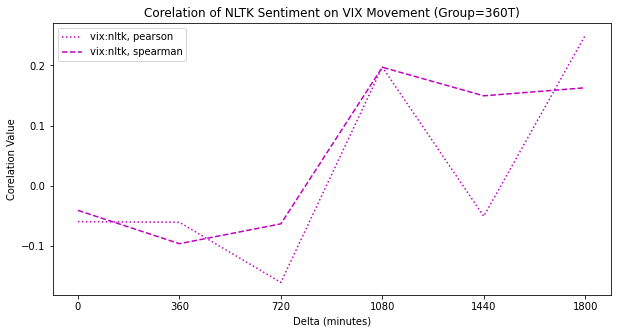

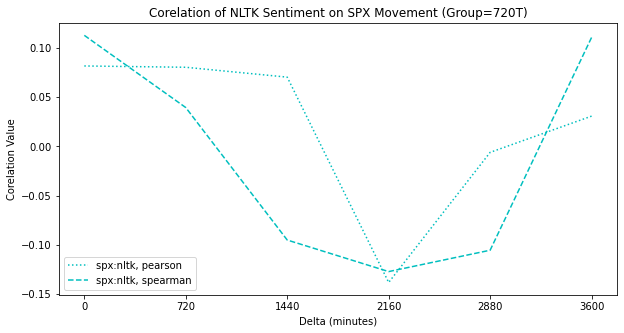

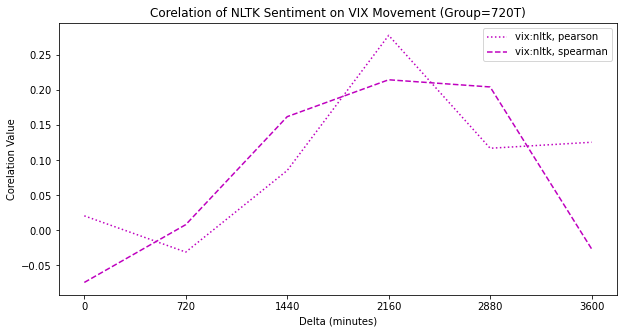

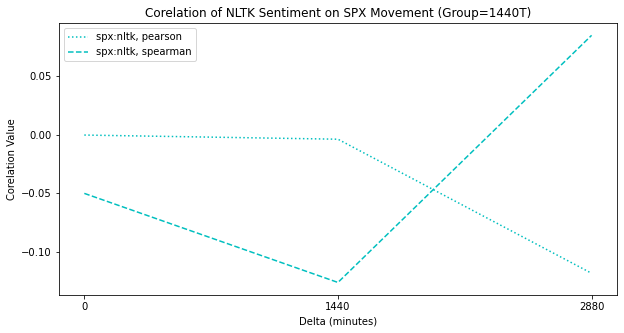

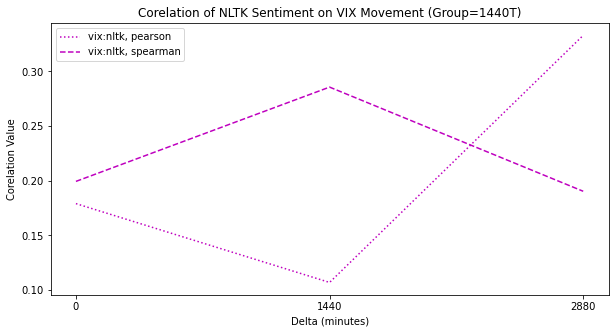

In [144]:
plot_cor_vs_delta4(DATA)
